In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
import numpy as np

In [2]:
housevalue = fch()

In [3]:
X = pd.DataFrame(housevalue.data)
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y = housevalue.target

In [6]:
y.min()

0.14999

In [13]:
y.max()

5.00001

In [14]:
X.shape

(20640, 8)

In [15]:
y.shape

(20640,)

In [16]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [17]:
X.columns = housevalue.feature_names

In [18]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [19]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [22]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [23]:
Xtrain.shape

(14448, 8)

In [24]:
Xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [25]:
reg = LR().fit(Xtrain,Ytrain)

In [26]:
yhat = reg.predict(Xtest)

In [27]:
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [28]:
yhat.min()

-0.6528439725035824

In [29]:
yhat.max()

7.146198214270839

In [30]:
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [31]:
reg.intercept_

-36.256893229204074

In [32]:
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.4373589305968401),
 ('HouseAge', 0.010211268294493672),
 ('AveRooms', -0.10780721617317635),
 ('AveBedrms', 0.6264338275363786),
 ('Population', 5.21612535341231e-07),
 ('AveOccup', -0.0033485096463336797),
 ('Latitude', -0.413095937894771),
 ('Longitude', -0.42621095362084827)]

In [34]:
from sklearn.metrics import mean_squared_error as MSE

In [35]:
MSE(yhat,Ytest)

0.5309012639324571

In [36]:
Ytest.mean()

2.0819292877906976

In [37]:
import sklearn

In [38]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [40]:
cross_val_score(reg,X,y,cv=10,scoring="neg_mean_squared_error")*(-1)

array([0.48922052, 0.43335865, 0.8864377 , 0.39091641, 0.7479731 ,
       0.52980278, 0.28798456, 0.77326441, 0.64305557, 0.3275106 ])

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(yhat,Ytest)

0.3380653761555984

In [43]:
r2 = reg.score(Xtest,Ytest)

In [44]:
r2

0.6043668160178817

In [47]:
cross_val_score(reg,X,y,cv=10,scoring="r2").mean()

0.5110068610524556

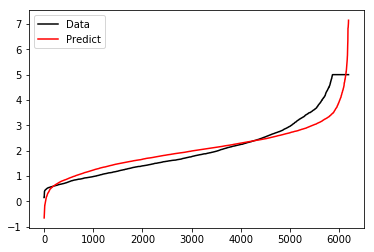

In [49]:
import matplotlib.pyplot as plt
sorted(Ytest)

plt.plot(range(len(Ytest)),sorted(Ytest),c='black',label='Data')
plt.plot(range(len(yhat)),sorted(yhat),c="red",label='Predict')
plt.legend()
plt.show()

In [51]:
rng = np.random.RandomState(42)
X = rng.randn(100,80)
y = rng.randn(100)
cross_val_score(LR(),X,y,cv=5,scoring='r2').mean()

-67.8534282295845

In [52]:
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch

In [53]:
housevalue = fch()

In [54]:
X = pd.DataFrame(housevalue.data)
y = housevalue.target

In [55]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [56]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [57]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=0)

In [58]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [59]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
1,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
2,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
3,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
4,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81


In [60]:
Xtrain.shape

(14448, 8)

In [61]:
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.592609622050885

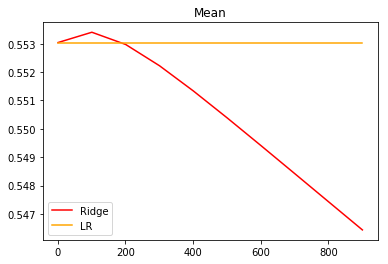

In [62]:
alpharange = np.arange(1,1001,100)
ridge,lr = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring='r2').mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring='r2').mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color='red',label='Ridge')
plt.plot(alpharange,lr,color='orange',label='LR')
plt.title('Mean')
plt.legend()
plt.show()

In [63]:
reg = Ridge(alpha=80).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.5924114272693897

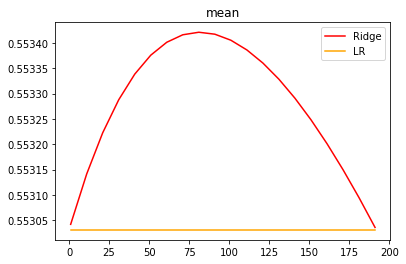

In [64]:
alpharange = np.arange(1,201,10)
ridge,lr = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = 'r2').mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring='r2').mean()
    ridge.append(regs)
    lr.append(linears)
    
plt.plot(alpharange,ridge,color='red',label='Ridge')
plt.plot(alpharange,lr,color='orange',label='LR')
plt.title('mean')
plt.legend()
plt.show()

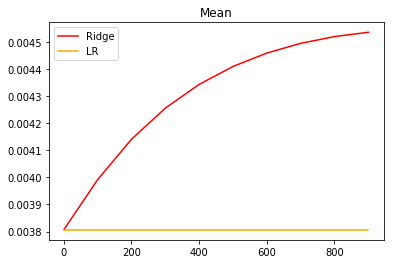

In [65]:
# 模型方差变化
alpharange = np.arange(1,1001,100)
ridge,lr = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varL = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varL)
plt.plot(alpharange,ridge,color='red',label='Ridge')
plt.plot(alpharange,lr,color='orange',label='LR')
plt.title('Mean')
plt.legend()
plt.show()

# sklearn中，我们有带交叉验证的岭回归可以使用

In [67]:
from sklearn.linear_model import RidgeCV,LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch

In [68]:
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [70]:
Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                ,store_cv_values = True
                ).fit(X,y)

In [71]:
Ridge_.score(X,y)

0.6060251767338442

In [ ]:
Ridge_.cv_values_.mean(axis=0)

In [73]:
Ridge_.alpha_

101

In [74]:
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.datasets import fetch_california_housing as fch

In [79]:
housevalue = fch()

In [80]:
X = pd.DataFrame(housevalue.data)
y = housevalue.target

In [81]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [82]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [83]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=0)

In [84]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [85]:
reg = LinearRegression().fit(Xtrain,Ytrain)

In [87]:
(reg.coef_*100).tolist()

[44.67739747419855,
 0.9184099904557081,
 -11.81167746949299,
 64.22908791744344,
 -0.0009370265069759638,
 -0.40853593409716105,
 -40.90233123057445,
 -42.341956384254246]

In [88]:
Ridge = Ridge(alpha=0).fit(Xtrain,Ytrain)
(Ridge.coef_*100).tolist()

[44.677397474198536,
 0.9184099904557418,
 -11.811677469493,
 64.22908791744338,
 -0.0009370265069761328,
 -0.4085359340971566,
 -40.902331230574326,
 -42.34195638425412]

In [89]:
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[44.67739747419854,
 0.9184099904557418,
 -11.811677469492942,
 64.22908791744322,
 -0.0009370265069761162,
 -0.40853593409715766,
 -40.9023312305744,
 -42.34195638425421]

In [96]:
Ridge_ = Ridge(alpha=1).fit(Xtrian,Ytrain)
(Ridge_.coef_*100).tolist()

TypeError: 'Ridge' object is not callable

In [92]:
lasso_ = Lasso(alpha=10**4).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [93]:
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[14.78547514884006,
 0.5650002882455887,
 0.0,
 -0.0,
 -0.0008490610197272525,
 -0.0,
 -0.0,
 -0.0]

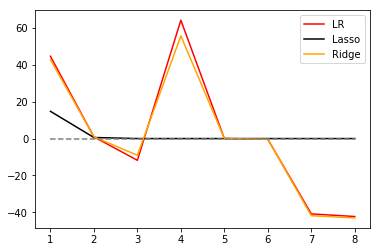

In [97]:
plt.plot(range(1,9),(reg.coef_*100).tolist(),color='red',label='LR')
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color='k',label='Lasso')
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color='orange',label='Ridge')
plt.plot(range(1,9),[0]*8,color='grey',linestyle='--')
plt.legend()
plt.show()

In [98]:
from sklearn.linear_model import LassoCV

In [99]:
alpharange = np.logspace(-10,-2,200,base=10)

In [100]:
alpharange.shape

(200,)

In [101]:
lasso_ = LassoCV(alphas = alpharange,cv=5).fit(Xtrain,Ytrain)

In [102]:
lasso_.alpha_

0.0032929712550971483

In [104]:
lasso_.mse_path_.shape

(200, 5)

In [105]:
lasso_.mse_path_.mean(axis=1)

array([0.52446027, 0.52380704, 0.52328569, 0.52287601, 0.52255731,
       0.52231233, 0.52212685, 0.52198916, 0.52188979, 0.52182085,
       0.52177601, 0.52175009, 0.52173878, 0.52173891, 0.52174758,
       0.52176264, 0.52178239, 0.52180538, 0.52183021, 0.5218564 ,
       0.52188313, 0.5219099 , 0.52193623, 0.5219619 , 0.52198662,
       0.52201016, 0.52203267, 0.52205398, 0.52207405, 0.52209289,
       0.52211051, 0.52212693, 0.52214222, 0.52215642, 0.52216957,
       0.52218173, 0.52219296, 0.52220332, 0.52221287, 0.52222166,
       0.52222974, 0.52223716, 0.52224398, 0.52225023, 0.52225597,
       0.52226123, 0.52226604, 0.52227045, 0.52227448, 0.52227818,
       0.52228155, 0.52228464, 0.52228746, 0.52229004, 0.52229239,
       0.52229455, 0.52229651, 0.52229831, 0.52229994, 0.52230144,
       0.5223028 , 0.52230405, 0.52230519, 0.52230622, 0.52230717,
       0.52230803, 0.52230882, 0.52230954, 0.5223102 , 0.52231079,
       0.52231134, 0.52231184, 0.52231229, 0.5223127 , 0.52231

In [106]:
lasso_.coef_

array([ 4.34430380e-01,  9.42389838e-03, -9.43906854e-02,  5.23536882e-01,
       -8.28122746e-06, -4.10555894e-03, -4.05722021e-01, -4.18318905e-01])

In [107]:
lasso_.score(Xtest,Ytest)

0.5924104427135437

In [108]:
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.5926087785518779

In [109]:
ls_ = LassoCV(eps=0.00001
             ,n_alphas=300
             ,cv=5).fit(Xtrain,Ytrain)

In [110]:
ls_.alpha_

0.0031173041312989682

In [111]:
ls_.alphas_.shape

(300,)

In [112]:
ls_.score(Xtest,Ytest)

0.5924402610619242

In [113]:
ls_.coef_

array([ 4.35089082e-01,  9.41111168e-03, -9.56566809e-02,  5.29873080e-01,
       -8.33930288e-06, -4.10448242e-03, -4.05897677e-01, -4.18590563e-01])

线性关系图不等于数据分布图，线性关系图横坐标是特征，纵坐标是标签，而数据分布图横坐标是特征，纵坐标也是；在回归问题中，   
当数据能分布在一条直线上时，我们说该数据是线性分布，否则是非线性的。在分类问题中，横坐标和纵坐标都是特征，点的颜色是   
标签，当点可以被一条直线分开时，我们说它是线性可分的，点不能被一条直线分开时，线性不可分。

所谓线性模型，指自变量都是一次项

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeClassifier

In [115]:
rnd = np.random.RandomState(42)

In [116]:
X = rnd.uniform(-3,3,size=100)

In [117]:
X.shape

(100,)

In [120]:
pd.DataFrame(np.unique(X)).head()

,0
0,-2.966867
1,-2.876493
2,-2.847485
3,-2.793669
4,-2.728636


In [121]:
len(np.unique(X).tolist())

100

In [122]:
rnd = np.random.RandomState(42)
X = rnd.uniform(-3,3,size=100)

In [123]:
y = np.sin(X) + rnd.normal(size=len(X))/3

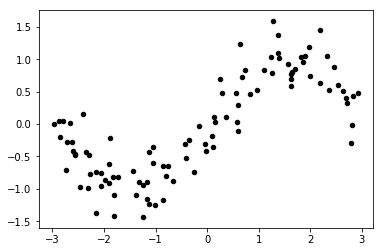

In [124]:
plt.scatter(X,y,marker='o',c='k',s=20)
plt.show()

In [125]:
X = X.reshape(-1,1)
X

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 0

In [127]:
from sklearn.tree import DecisionTreeRegressor
LinearR = LinearRegression().fit(X,y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X,y)

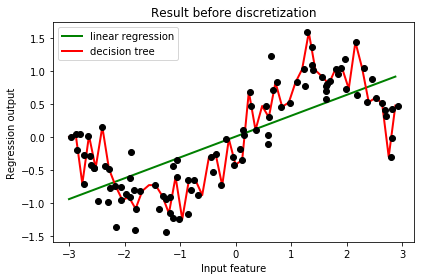

In [129]:
fig,ax1 = plt.subplots(1)
line = np.linspace(-3,3,endpoint=False).reshape(-1,1)

ax1.plot(line,LinearR.predict(line),linewidth=2,color='green',label='linear regression')
ax1.plot(line,TreeR.predict(line),linewidth=2,color='red',label='decision tree')

ax1.plot(X[:,0],y,'o',c='k')
ax1.legend(loc='best')
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

In [130]:
from sklearn.preprocessing import KBinsDiscretizer

In [131]:
enc = KBinsDiscretizer(n_bins=10,encode='onehot')
X_binned = enc.fit_transform(X)

In [132]:
X_binned.shape

(100, 10)

In [133]:
import pandas as pd

In [136]:
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
LinearR_ = LinearRegression().fit(X_binned,y)
LinearR_.predict(line)

ValueError: shapes (50,1) and (10,) not aligned: 1 (dim 1) != 10 (dim 0)

In [138]:
line_binned = enc.transform(line)

In [139]:
line_binned.shape

(50, 10)

In [140]:
line_binned

<50x10 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [141]:
from sklearn.preprocessing import KBinsDiscretizer

In [142]:
enc = KBinsDiscretizer(n_bins=10,encode='onehot')
X_binned = enc.fit_transform(X)   # 分箱后的特征

In [143]:
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

In [144]:
line.shape

(1000, 1)

In [145]:
X_binned.shape

(100, 10)

In [146]:
line_binned = enc.transform(line)
line_binned.shape

(1000, 10)

In [147]:
LinearR_ = LinearRegression().fit(X_binned,y)
LinearR_.predict(line_binned)

array([-0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22

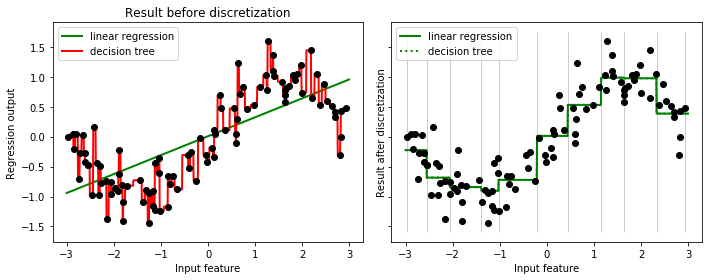

In [159]:
# # 分箱前建模
# LinearR = LinearRegression().fit(X,y)
# TreeR = DecisionTreeRegressor().fit(X)
# 分箱
enc = KBinsDiscretizer(n_bins=10,encode='onehot')
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

fig,(ax1,ax2) = plt.subplots(ncols=2
                            ,sharey=True
                            ,figsize=(10,4)
                            )
# 在图1上布置在原始数据上建模的结果
ax1.plot(line,LinearR.predict(line),linewidth=2,color='green',label='linear regression')
ax1.plot(line,TreeR.predict(line),linewidth=2,color='red',label = 'decision tree')
ax1.plot(X[:,0],y,'o',c='k')
ax1.legend(loc='best')
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# 使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned,y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned,y)

# 进行预测，用分箱后的数据进行预测建模
ax2.plot(line,LinearR_.predict(line_binned),linewidth=2,color='green',linestyle='-',label='linear regression')
ax2.plot(line,TreeR_.predict(line_binned),linewidth=2,color='green',linestyle=':',label='decision tree')
ax2.vlines(enc.bin_edges_[0] #x轴
        , *plt.gca().get_ylim() #y轴的上限和下限
        , linewidth=1
        , alpha=.2) #将原始数据分布放置在图像上
ax2.plot(X[:,0],y,'o',c='k')
ax2.legend(loc='best')
ax2.set_xlabel("Input feature")
ax2.set_ylabel("Result after discretization")
plt.tight_layout()
plt.show()

0.9566086751329097


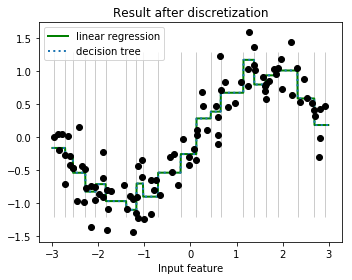

In [163]:
enc = KBinsDiscretizer(n_bins=20,encode='onehot')
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)
fig,ax2 = plt.subplots(1,figsize=(5,4))
LinearR_ = LinearRegression().fit(X_binned,y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned,y)
ax2.plot(line
        ,LinearR_.predict(line_binned)
        ,linewidth=2
        ,color='green'
        ,linestyle='-'
        ,label='linear regression')
ax2.plot(line
        ,TreeR_.predict(line_binned)
        ,linewidth=2
        ,linestyle=':'
        ,label='decision tree')
ax2.vlines(enc.bin_edges_[0],*plt.gca().get_ylim(),linewidth=1,alpha=.2)
ax2.plot(X[:,0],y,'o',c='k')
ax2.legend(loc='best')
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

### 通过交叉验证选择最优箱子

In [164]:
from sklearn.model_selection import cross_val_score as CVS

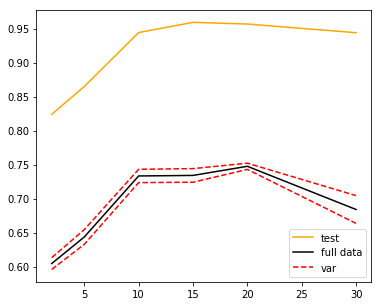

In [167]:
from sklearn.model_selection import cross_val_score as CVS
import numpy as np

pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]

for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    
    #建立模型
    LinearR_ = LinearRegression()
    
    #全数据集上的交叉验证
    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
    
#绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

In [168]:
from sklearn.preprocessing import PolynomialFeatures

In [170]:
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [171]:
poly = PolynomialFeatures(degree=2)

In [172]:
X_ = poly.fit_transform(X)
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

#### 多项式回归

###### 通过增加自变量上的次数，而将数据映射到高维空间的方法，多项式Kernel在低维解释上帮助我们，   
###### 而多项式变化在高维呈现上帮助我们，作用于特征矩阵，对数据进行调整，从而让这个数据被线性   
###### 回归来进行拟合

In [1]:
from sklearn.preprocessing import PolynomialFeatures 
import numpy as np
import pandas as pd

In [2]:
X = np.arange(4).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3]])

degree   
interaction_only   
include_bias

In [3]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
X_

array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [4]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [5]:
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [6]:
xxx = PolynomialFeatures(degree=3).fit_transform(X)

In [7]:
xxx.shape

(4, 4)

In [11]:
rnd = np.random.RandomState(42)
y = rnd.randn(4)
y

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986])

In [12]:
from sklearn.linear_model import LinearRegression
LinearRegression().fit(xxx,y).coef_

array([ 0.        , -1.78929171,  1.37623705, -0.2219238 ])

In [13]:
LinearRegression().fit(xxx,y).intercept_

0.49671415301123156

In [14]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [15]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [16]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [17]:
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [18]:
X = np.arange(9).reshape(3,3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [19]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [20]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,
         36.,  45.,  48.,  60.,  75.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64., 216.,
        252., 288., 294., 336., 384., 343., 392., 448., 512.]])

In [21]:
X = PolynomialFeatures(degree=20).fit_transform(X)
X.shape

(3, 1771)

In [23]:
rnd = np.random.RandomState(42)
X = rnd.uniform(-3,3,size=100)
y = np.sin(X) + rnd.normal(size=len(X))/3
X = X.reshape(-1,1)

In [25]:
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
LinearR = LinearRegression().fit(X,y)

In [26]:
LinearR.score(X,y)

0.5361526059318595

In [27]:
LinearR.score(line,np.sin(line))

0.6800102369793312

In [30]:
poly = PolynomialFeatures(degree=5)
X_ = poly.fit_transform(X)
line_ = PolynomialFeatures(degree=5).fit_transform(line)

LinearR_ = LinearRegression().fit(X_,y)
LinearR_.score(X_,y)

0.8561679370344799

In [31]:
LinearR_.score(line_,np.sin(line))

0.9868904451787955

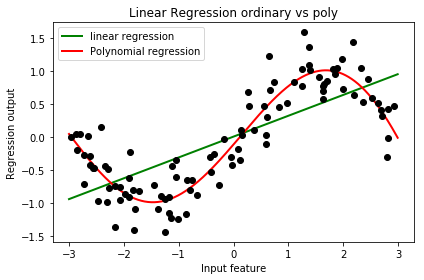

In [36]:
import matplotlib.pyplot as plt

d = 5
LinearR = LinearRegression().fit(X,y)

X_ = PolynomialFeatures(degree=5).fit_transform(X)
LinearR_ = LinearRegression().fit(X_,y)

line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
line_ = PolynomialFeatures(degree=d).fit_transform(line)

fig,ax1 = plt.subplots(1)
ax1.plot(line,LinearR.predict(line),linewidth=2,color='green',label='linear regression')
ax1.plot(line,LinearR_.predict(line_),linewidth=2,color='red',label='Polynomial regression')
ax1.plot(X[:,0],y,'o',c='k')
ax1.legend(loc='best')
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()

In [37]:
poly.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']

In [38]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
housevalue = fch()

In [39]:
X = pd.DataFrame(housevalue.data)
y = housevalue.target

In [41]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [42]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [43]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [44]:
poly = PolynomialFeatures(degree=2).fit(X,y)

In [45]:
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [46]:
X_ = poly.transform(X)

In [47]:
reg = LinearRegression().fit(X_,y)

In [48]:
coef = reg.coef_

In [49]:
coef

array([ 5.91954144e-08, -1.12430256e+01, -8.48898556e-01,  6.44105937e+00,
       -3.15913307e+01,  4.06090679e-04,  1.00386233e+00,  8.70568191e+00,
        5.88063275e+00, -3.13081213e-02,  1.85994801e-03,  4.33020400e-02,
       -1.86142308e-01,  5.72831453e-05, -2.59019453e-03, -1.52505718e-01,
       -1.44242944e-01,  2.11725349e-04, -1.26218993e-03,  1.06115045e-02,
        2.81885223e-06, -1.81716949e-03, -1.00690374e-02, -9.99950183e-03,
        7.26947766e-03, -6.89064376e-02, -6.82365529e-05,  2.68878839e-02,
        8.75089946e-02,  8.22890394e-02,  1.60180956e-01,  5.14263995e-04,
       -8.71911388e-02, -4.37043033e-01, -4.04150609e-01,  2.73779343e-09,
        1.91426754e-05,  2.29529854e-05,  1.46567766e-05,  8.71561033e-05,
        2.13344592e-02,  1.62412938e-02,  6.18867357e-02,  1.08107173e-01,
        3.99077351e-02])

In [50]:
[*zip(poly.get_feature_names(X.columns),reg.coef_)]

[('1', 5.919541435538823e-08),
 ('住户收入中位数', -11.243025626342437),
 ('房屋使用年代中位数', -0.8488985558284562),
 ('平均房间数目', 6.4410593651213635),
 ('平均卧室数目', -31.591330651295365),
 ('街区人口', 0.00040609067929028186),
 ('平均入住率', 1.003862327021211),
 ('街区的纬度', 8.705681910190394),
 ('街区的经度', 5.8806327457107965),
 ('住户收入中位数^2', -0.0313081213151669),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599480067008538),
 ('住户收入中位数 平均房间数目', 0.043302039980649264),
 ('住户收入中位数 平均卧室数目', -0.18614230762148926),
 ('住户收入中位数 街区人口', 5.728314525856295e-05),
 ('住户收入中位数 平均入住率', -0.0025901945279693736),
 ('住户收入中位数 街区的纬度', -0.15250571773355712),
 ('住户收入中位数 街区的经度', -0.1442429442847879),
 ('房屋使用年代中位数^2', 0.00021172534934901734),
 ('房屋使用年代中位数 平均房间数目', -0.001262189925797411),
 ('房屋使用年代中位数 平均卧室数目', 0.010611504463207522),
 ('房屋使用年代中位数 街区人口', 2.818852232910943e-06),
 ('房屋使用年代中位数 平均入住率', -0.0018171694880040896),
 ('房屋使用年代中位数 街区的纬度', -0.010069037386845982),
 ('房屋使用年代中位数 街区的经度', -0.009999501833041565),
 ('平均房间数目^2', 0.00726947766112956),
 ('平均房间数目 平均卧

In [51]:
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T

In [52]:
coeff.head()

,0,1
0,1,5.91954e-08
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
3,平均房间数目,6.44106
4,平均卧室数目,-31.5913


In [53]:
coeff.columns = ["feature","coef"]

In [54]:
coeff.sort_values(by="coef").head()

,feature,coef
4,平均卧室数目,-31.5913
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151


In [55]:
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)

In [56]:
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.6062326851998051

In [57]:
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))

R2:0.7450018099106768
time:2.0156140327453613


In [58]:
from sklearn.ensemble import RandomForestRegressor as RFR
time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

R2:0.9742289994896846
time:17.416853427886963


随机森林虽然效果好，但是跑的太慢了，线性模型速度快，工程能力强。